In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Ucitavanje podataka i opis

- Boston dataset
- Predvidjanje cene (medijana) za kucu u odredjenoj regiji Bostona (u hiljadama dolara)
- Regiju odredjuju ulazni atributi (nivo kriminala u regiji, zagadjenost, starost kuce itd)
- Pod medijanom cene misli se na predvidjane one cene kuce koja deli ukupan skup na dva jednaka dela

Ucitavamo podatke iz *comma-separated values* (CSV) foldera pod nazivom 'housing.csv' koji se nalazi u istom folderu kao i ovaj notebook.
Kako su nazivi kolona u okviru samog csv-a izostavljeni to moramo dodati u sam *data-frame* za dalju analizu.

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
np.shape(data)

(506, 14)

Imamo 14 kolona i 506 redova (data point-ova)

Kolone jesu:

---

- *CRIM - per capita crime rate by town*
- *ZN - proportion of residential land zoned for lots over 25,000 sq.ft.*
- *INDUS - proportion of non-retail business acres per town.*
- *CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)*
- *NOX - nitric oxides concentration (parts per 10 million)*
- *RM - average number of rooms per dwelling*
- *AGE - proportion of owner-occupied units built prior to 1940*
- *DIS - weighted distances to five Boston employment centres*
- *RAD - index of accessibility to radial highways*
- *TAX - full-value property-tax rate per 10,000 dollars*
- *PTRATIO - pupil-teacher ratio by town*
- *B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*
- *LSTAT - % lower status of the population*
- *MEDV - Median value of owner-occupied homes in 1000's dollars*

---


Detaljniji opis podataka preko funkcije *describe()*.

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Iz gornjeg opisa podataka na prvi pogled nekoliko kolona se izdvaja. To su:
- ZN (racio stambene zone za placeve preko 25,000 metara kvadratnih)
- CHAS (*Charles* reka *dummie* varijable gde je 0 za one naseljive regije koje nisu pored reke, a 1 za one koje jesu)

Ove 2 varijable imaju 0 za odredjene percentile, tacnije ZN za 25 i 50 percentil, a CHAS kolona za 25,50 i 75. Ovo je medjutim vrlo razumljivo jer su obe kolone **kategoricke** ali i **uslovne** (ako-onda). Na prvu loptu ideja je da ove dve vrednosti (kolone) nece biti od prevelike koristi u problemu regresije (predvidjanja medijane za cenu) ali ostavljamo ih za sada netaknute.

Preimenovacemo samo target varijablu (medijana cene - MEDV) u *Price* zbog razumljivosti.

In [5]:
data = data.rename(columns={'MEDV':'Price'})

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Sledeci korak - proveravamo nedostajuce vrednosti

In [8]:
data.isnull().sum()
# Nemamo nedostajucih vrednosti (NA vrednosti)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# 2. *EDA - Exploratory Data Analysis* (Proucavanje podataka)

Uvek korisna informacija jeste dobiti znanje o mogucim ekstreminm vrednostima ili **autlajerima**. Iz opisa dataseta mozemo videti da Varijabla pod brojem 14 cenzurisana na vrednosti MEDV od 50 (sto je medijana 50.000$) sto moze implicirati da vrednosti preko 50 nece biti od koristi u problemu predvidjanja vrednosti MEDV.

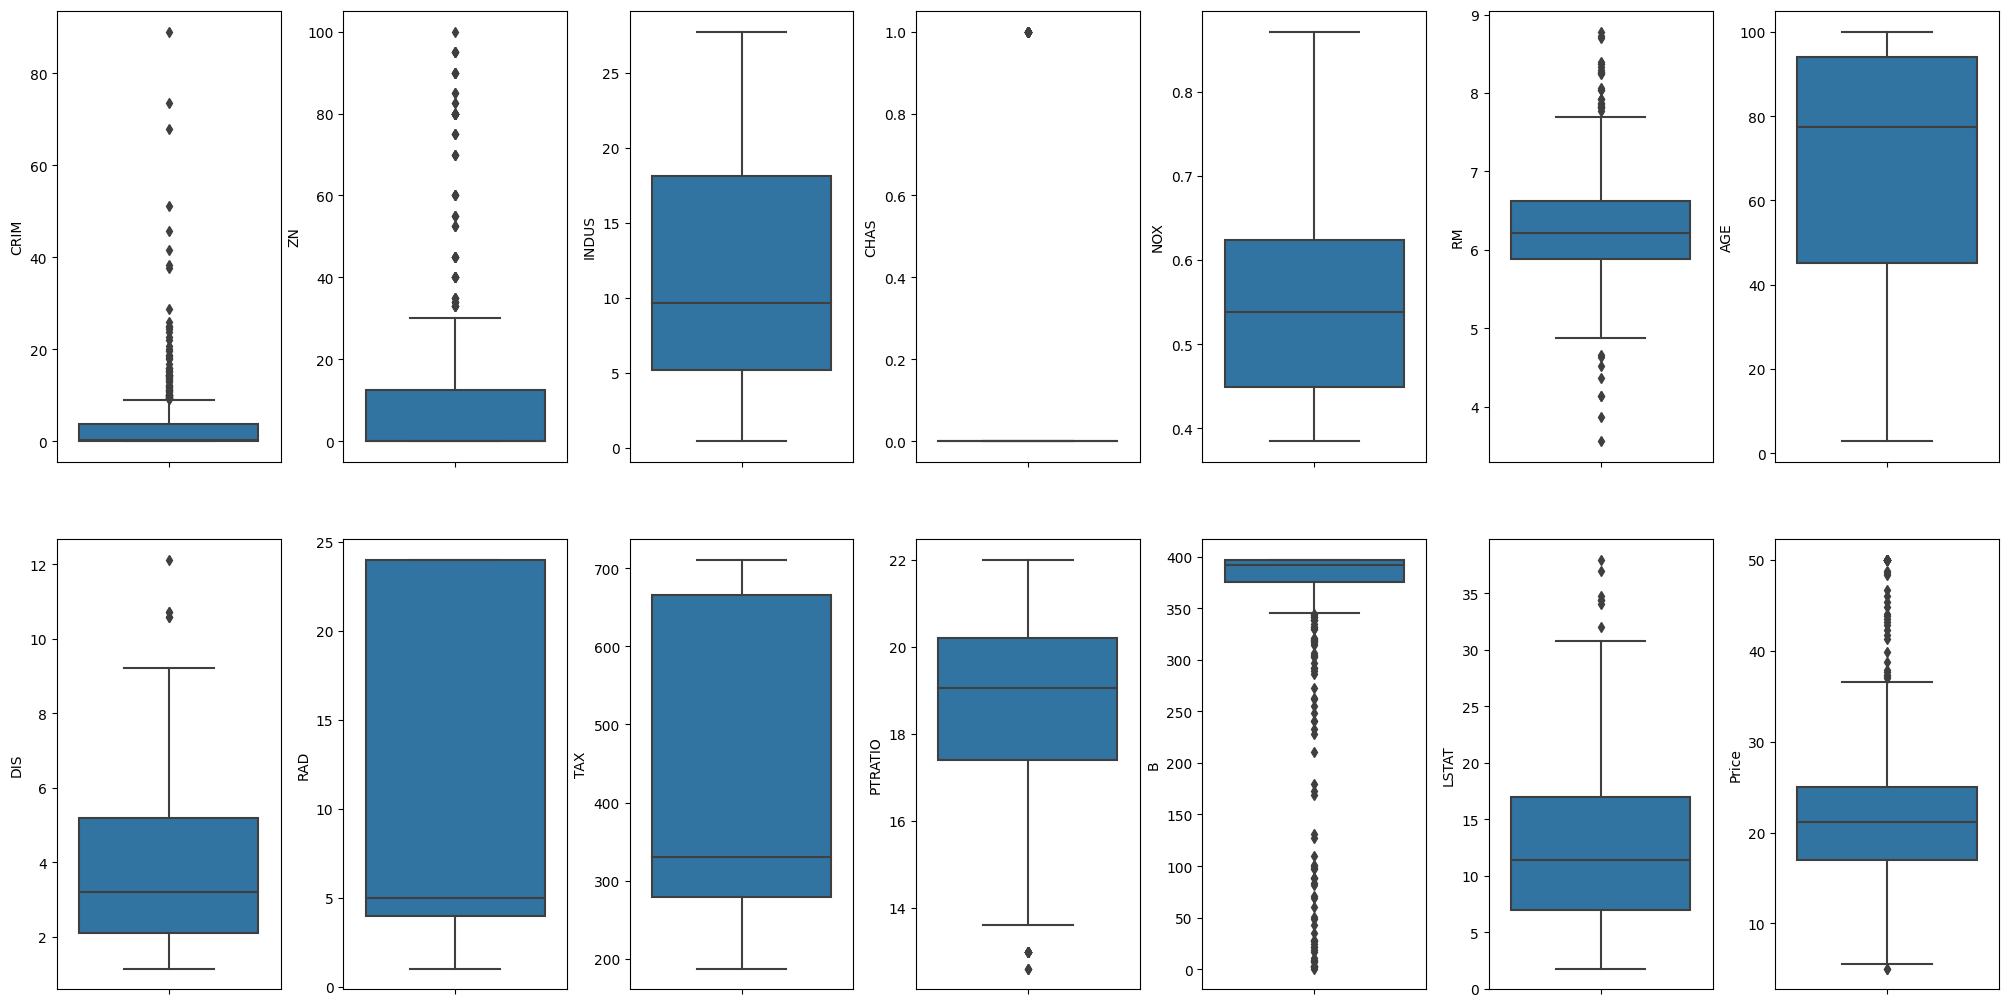

In [9]:
fig, axis = plt.subplots(nrows=2,ncols=7, figsize=(20,10))
index = 0
axis = axis.flatten()
for k,v in data.items():
    sns.boxplot(y=k,data=data,ax=axis[index])
    index += 1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

Bilo bi jos korisnije ako bi znali procentualni udeo autlajera u nasim atributima. Zelimo da utvrdimo tacno koji procenat nasih podataka je ekstreman u svojoj vrednosti za atribute.

In [10]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column Price outliers = 7.91%


Pogledajmo raspodelu nase ciljanje varijable - Price.

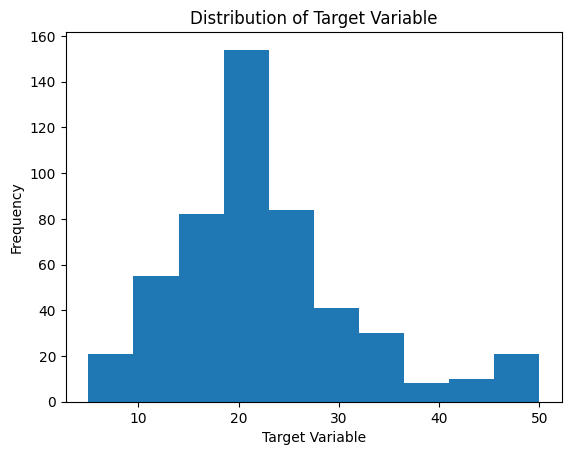

In [11]:
plt.hist(data['Price'], bins=10) 
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

Vidimo da odredjen broj podataka ima vrednost 50 (sto je maksimalna vrednost za atribut Price) a time su i autlajeri. Takodje moze se primetiti da nasa izlazna varijabla ima **normalnu** raspodelu.

In [12]:
count = data[data['Price'] >= 50].shape[0]
print(count)

16


Ove vrednosti nisu zanemarljive (ima ih 16) tako da je mozda najpametnije odstraniti ih iz dalje analize radi umanjivanja mogucnosti problema u daljem radu sa modelima i predvidjanjima.

In [13]:
data = data[data['Price'] < 50]
np.shape(data)

(490, 14)

Ako sada pogledamo procente autlajera videcemo da su procenti Price autlajera pali sa 7.91% na 4.49% sto smo i hteli. Medjutim minimalno se povecao procenat autlajera za neke druge atribute sto je logicno je smo odstranili 16 redova iz naseg dataseta prethodnim korakom,a za neke se i smanjio. Medjutim sve promene su neznatne osim za pomenuti Price atribut.

In [14]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.27%
Column ZN outliers = 13.27%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 4.69%
Column AGE outliers = 0.00%
Column DIS outliers = 1.02%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.65%
Column B outliers = 15.92%
Column LSTAT outliers = 1.43%
Column Price outliers = 4.49%


Kreiranje **korelacione matrice** izmedju atributa je uvek dobar alat za dalji rad. Default metoda korelacije u funkciji *corr()* je *pearson* metoda gde se uporedjuju 2 atributa na takav nacin da je rezultat uvek u opsegu [-1,1]. Nize vrednosti sugerisu negativnu a vise vrednosti pozitivnu korelaciju atributa koji se uporedjuju putem ove *pearson* metode.

Ono sto je bitno jeste provera **multikolinearnosti** za ovaj dataset. Ako postoji visoka korelisanost izmedju neka dva ulazna atributa (*independent* atributa) tada je razumljivo izbaciti jedan od takva dva atributa. Pod visokom korelisanoscu podrazumevamo kako visoku pozitivnu tako i visoku negativnu korelisanost atributa.

<Axes: >

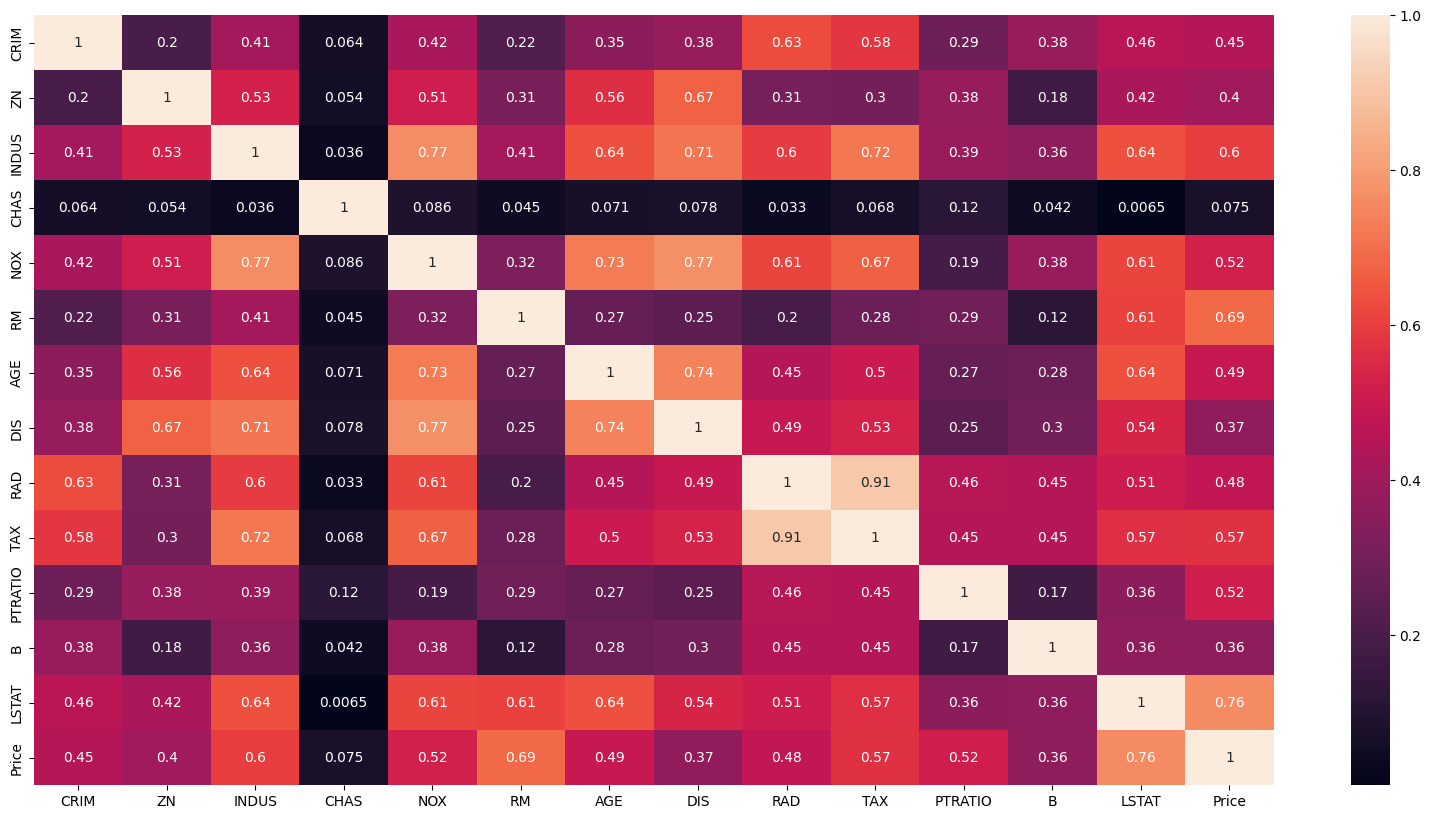

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().abs(),annot=True)

Sa korelacione matrice vidimo visoku pozitivnu korelisanost izmedju atributa TAX i RAD sto sugerise na postojanje multikolinearnosti ova dva atributa. Sa druge strane, visoku korelisanost sa izlaznim atributom (Price) imaju ulazni atributi **RM, LSTAT, PTRATIO, INDUS, NOX i TAX**. Sve vrednosti korelisanosti su iznad 0.5 sto je zadavoljavajuce (svi slucajevi su pozitvno korelisani). Pomenute atribute cemo i plotovati u odnosu na ciljani atribut.

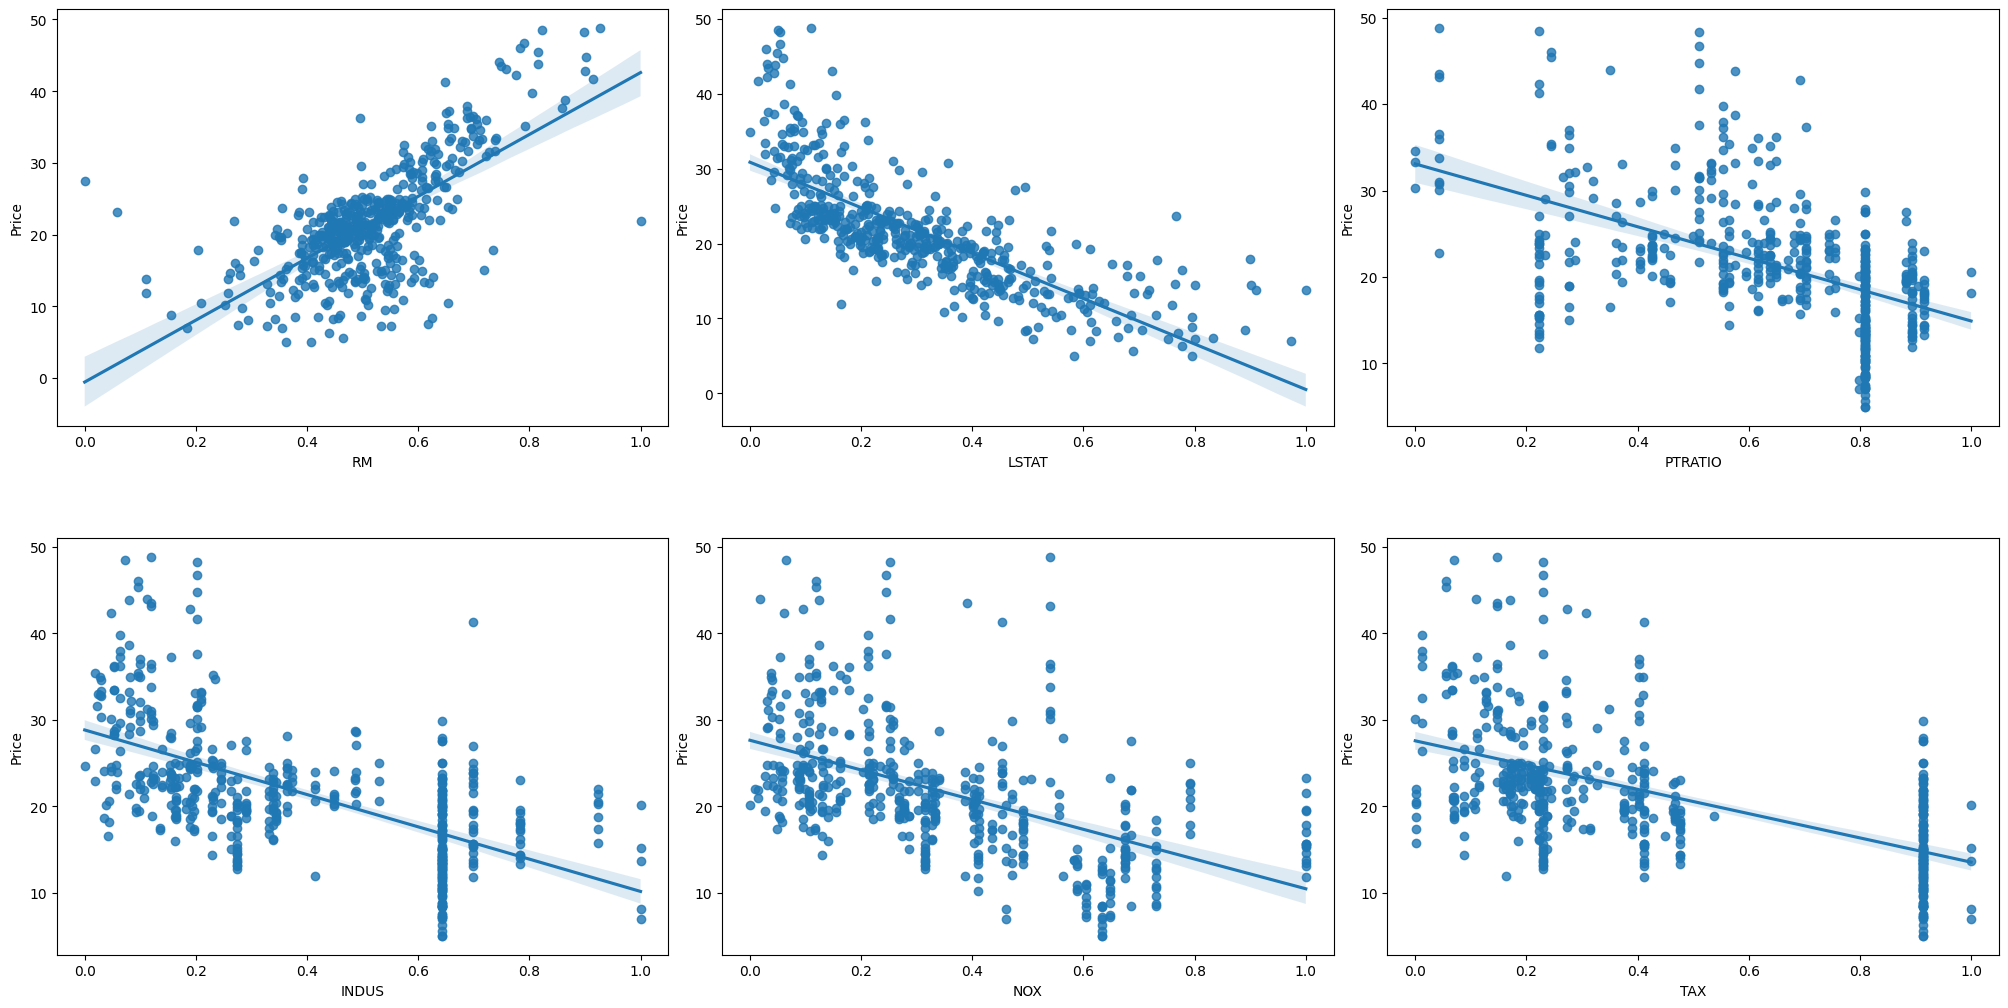

In [16]:
from sklearn import preprocessing

# Zelimo da SKALIRAMO nase atribute pre nego sto ih plot-ujemo u odnosu na MEDV
min_max_scaler = preprocessing.MinMaxScaler()
cols = ['RM','LSTAT','PTRATIO','INDUS','NOX','TAX']
x = data.loc[:,cols]
y = data['Price']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=cols)
fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(20,10))
index = 0
axs = axs.flatten()
for i, k in enumerate(cols):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# 3. Kreiranje modela

Po planu koristimo odabrane prediktore (RM, LSTAT, PTRATIO, INDUS, NOX i TAX) za nasu ciljanu varijablu. Sledeci korak jeste radjenje trening/test splita.

In [17]:
x.head()

,RM,LSTAT,PTRATIO,INDUS,NOX,TAX
0,0.577505,0.083356,0.287234,0.058148,0.314815,0.208015
1,0.547998,0.198944,0.553191,0.234444,0.172840,0.104962
2,0.694386,0.056960,0.553191,0.234444,0.172840,0.104962
3,0.658555,0.026674,0.648936,0.053333,0.150206,0.066794
4,0.687105,0.093081,0.648936,0.053333,0.150206,0.066794


In [18]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 490, dtype: float64

Deljene skupa podataka na osnovu data-frejma od ranije (x) i izlazne varijable (y). Skup cemo podeliti prema raciju 70-30 kao trening i test skup.

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [20]:
X_train

,RM,LSTAT,PTRATIO,INDUS,NOX,TAX
252,0.758574,0.146707,0.042553,0.119630,0.539095,0.146947
489,0.473079,0.163934,0.893617,0.414444,0.386831,0.164122
17,0.465415,0.352598,0.893617,0.274074,0.314815,0.229008
304,0.410807,0.264518,0.617021,0.339259,0.327160,0.223282
423,0.395861,0.580717,0.808511,0.642963,0.730453,0.914122
...,...,...,...,...,...,...
144,0.257137,0.758822,0.223404,0.697778,1.000000,0.412214
231,0.583445,0.149764,0.425532,0.155185,0.088477,0.215649
414,0.534010,0.435121,0.808511,0.642963,0.409465,0.914122
159,0.565051,0.150320,0.223404,0.697778,1.000000,0.412214


In [21]:
X_test

,RM,LSTAT,PTRATIO,INDUS,NOX,TAX
67,0.443955,0.170047,0.670213,0.197407,0.049383,0.301527
398,0.183560,0.972492,0.808511,0.642963,0.633745,0.914122
130,0.555087,0.295082,0.914894,0.783333,0.491770,0.477099
389,0.406591,0.583495,0.808511,0.642963,0.633745,0.914122
95,0.587086,0.129758,0.574468,0.079630,0.123457,0.169847
...,...,...,...,...,...,...
3,0.658555,0.026674,0.648936,0.053333,0.150206,0.066794
395,0.593217,0.534593,0.808511,0.642963,0.436214,0.914122
322,0.527879,0.102806,0.808511,0.164815,0.267490,0.070611
339,0.561219,0.111142,0.755319,0.018889,0.090535,0.282443


Kao prvi model uzecemo Linearnu regresiju.

In [22]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [23]:
regression.fit(X_train,y_train)

LinearRegression()

In [24]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [25]:
reg_pred = regression.predict(X_test)

### Dijagnosticki plotovi za Linearnu regresiju - procena modela preko dijagrama

Pogledajmo *scatter* plot da vidimo postoji li linearni trend izmedju predvidjenih i pravih vrednosti nakon Linearne regresije.

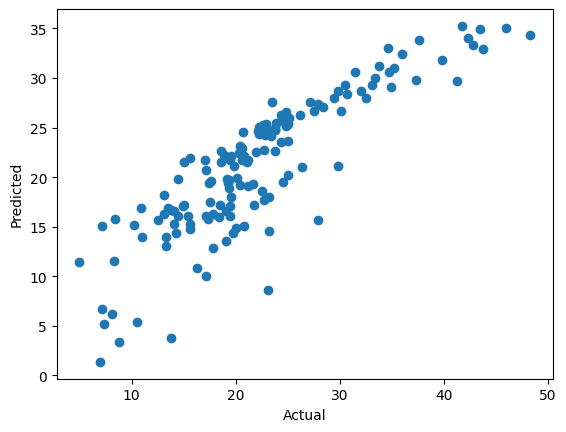

In [26]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Mozemo videti da nasa predvidjanja generalno prate trend i da postoji odredjena vrsta preciznosti.
Sledece sto mozemo uraditi jeste da proverimo raspodelu nasih reziduala - razlika izmedju prave i predvidjene vrednosti.

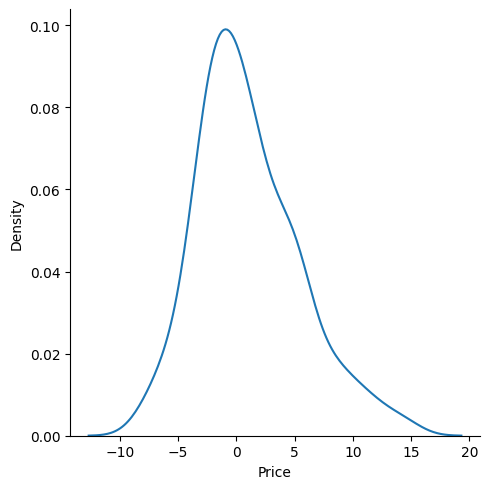

In [27]:
residuals = y_test - reg_pred
sns.displot(residuals, kind="kde")

Mozemo predpostaviti da je ovo neka vrsta normalne distribucije. Mozemo videti takodje da sa desne strane od 10 do 15+ imamo neke autlajere koji su preostali. Ali nasa greska (rezidual) ima interval kretanja od -10 do +7/8 otprilike sa nekim ekstremnim vrednostima preko 10 sto je zadovoljavajuce.

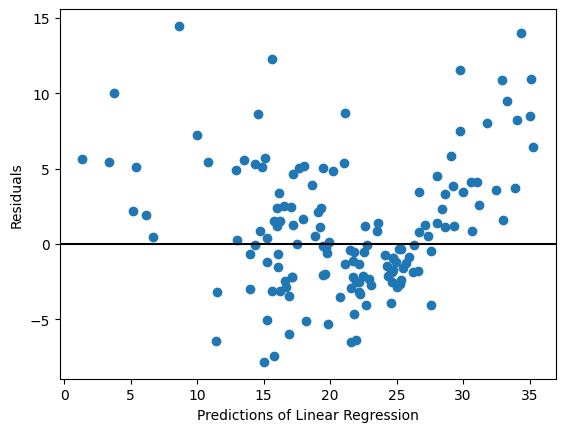

In [28]:
plt.scatter(reg_pred,residuals)
plt.xlabel("Predictions of Linear Regression")
plt.ylabel("Residuals")
plt.axhline(0, color='black',)

TERMIN:
**Homoskidasticnost** - jednako variranje reziduala oko nule. Clij jeste da vrednosti reziduala budu jednako rasprsene ispod i iznad linije sto ovde uglavnom jeste slucaj.

# 4. Metrike peformansi modela

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Prve metrike koje cemo iskoristiti jesu MAE i MSE - *mean squared error i mean absolute error*.
Glavna razlika ovih metrika jeste u konkretnom racucnanju greske modela, MAE koristi apsolutnu vrednost razlike prave i predvidjene vrednosti dok MSE koristi kvadrat iste te razlike.

Razlika izmedju metrika jeste sto MSE daje daleko vise tezine velikim greskama (to jest gde je razlika visoka izmedju predvidjene i stvarne vrednosti) upravo zbog pomenutog kvadrata. Konkretno formule su:
- MAE = mean(|y_true - y_pred|)
- MSE = mean((y_true - y_pred) ** 2)

Sa druge strane MAE sve greske tretira podjednako a razlog tome jeste apsoluta vrednost gore u formuli. MAE nam daje malo "tvrdju" metriku za racucanje greske, gde ista nije pogodjena postojanjem autlajera za razliku od MSE metrike. Generalno MAE na daje **generalnu** sliku preciznosti modela gde sve male vrednosti govore da je model precizan dok u slucaju vecih vrednosti MAE metrike predstavljaju neku vrstu vece greske.

*Root Mean Squared Error* (RMSE skraceno) predstavlja poslednju metriku koju racunamo. Najprostije RMSE predstavlja prosecnu gresku naseg modela. Ova metrika osim sto govori kolika je prosecna greska predvidjenih vrednosti i stvarnih takodje nam daje neki prikaz uticaja velikih gresaka. Velike greske naseg modela ce imati uticaj na RMSE metriku.

In [30]:
print("Mean Absolute Error:",mean_absolute_error(y_test,reg_pred))
print("Mean Squared Error:",mean_squared_error(y_test,reg_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,reg_pred)))

Mean Absolute Error: 3.3918616096705825
Mean Squared Error: 20.109637145473954
Root Mean Squared Error: 4.484377007508842


U proseku nas model gresi 4 (odnosno oko 4.000$ sto nam govori RMSE metrika), dok je ukupna suma kvadratne greske 16.5 sto je ukupna greska modela.

*R-squared* predstavlja kolicinu varijabiliteta izlaza koje nas model pokriva. Sto je bilze jedinici to je bolji izlaz modela. Rezultat ispod sugerise da je 77.8% varijabiliteta izlazne varijable (Price) objasnjeno preko ulaznih varijabli u nas model.

Uzgred *R-squared* metrika ne uzima u obzir broj ulaznih prediktora za model. Kako dodajemo broj ulaznih prediktora tako se prirodno povecava i R^2 cak i ako realno ne postoji veza sa izlaznim atributom.

In [31]:
from sklearn.metrics import r2_score

score = r2_score(y_test,reg_pred)
print("R-squared: {}".format(round(score,4)))

R-squared: 0.7292


*Adjuster R-squared* predstavlja modifikaciju *R-squared* metrike. Ona uzima u obzir broj ulaznih prediktora u model i penalizuje one prediktore koji su irelevantni ili slabo povezani za izlaznim atributom cime se preventuje pretreniranost.

In [32]:
adjusted_r = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R-squared: {}".format(round(adjusted_r,4)))

Adjusted R-squared: 0.7176


# 5. Predikcija novih podataka

In [33]:
first_row = data.head(1)
first_row

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0


In [34]:
columns_to_drop = ['CRIM','ZN','CHAS','AGE','DIS','RAD','B','Price']
first_row = first_row.drop(columns_to_drop,axis=1)
first_row

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,296.0,15.3,4.98


In [35]:
type(first_row)

pandas.core.frame.DataFrame

In [36]:
first_row.shape

(1, 6)

In [37]:
new_order = ['RM','LSTAT','PTRATIO','INDUS','NOX','TAX']
first_row = first_row[new_order]

In [38]:
first_row

,RM,LSTAT,PTRATIO,INDUS,NOX,TAX
0,6.575,4.98,15.3,2.31,0.538,296.0


In [39]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [40]:
regression.predict(min_max_scaler.transform(first_row))

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29.14197613])

# Pickle paket za Deployment

In [41]:
import pickle

In [42]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [43]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [44]:
pickled_model.predict(min_max_scaler.transform(first_row))

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29.14197613])

Dobijamo isti rezultat sto smo i hteli.